In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1O0xwyE37m2dTxio7W8A625eBS0Z2JEUW"})   # replace the id with id of file you want to access
downloaded.GetContentFile('10pCICIDS 2 class.csv')

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
df= pd.read_csv('10pCICIDS 2 class.csv')


In [ ]:
df = df.drop(columns="Unnamed: 0")

In [ ]:
df= shuffle (df)

In [ ]:
#df = df.drop(columns="Unnamed: 0")
df = df.replace(np.PINF, 0)
df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean(),inplace=True)
df[' Subflow Fwd Bytes'].fillna(df[' Subflow Fwd Bytes'].mean(),inplace=True)
df[' Subflow Bwd Bytes'].fillna(df[' Subflow Bwd Bytes'].mean(),inplace=True)
df[' Subflow Bwd Packets'].fillna(df[' Subflow Bwd Packets'].mean(),inplace=True)

In [ ]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
184897,443,169,2,1,0,0,0,0,0.000000,0.000000,0,0,0.00000,0.000000,0.000000e+00,17751.479290,8.450000e+01,1.180868e+02,168,1,1,1.000000e+00,0.000000e+00,1,1,0,0.0000,0.00,0,0,0,0,0,0,40,20,11834.319530,5917.159763,0,0,0.000000,0.000000,0.00000,1,0,0,0,0,0,0,0,0,0.000000,0.000000,0.00000,40,0,0,0,0,0,0,2.0,0.0,1.0,0.0,0,0,0,20,0.0,0.0,0,0,0.0,0.0,0,0,1
4184,58159,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.00000,0.000000,4.000000e+06,666666.666700,3.000000e+00,0.000000e+00,3,3,3,3.000000e+00,0.000000e+00,3,3,0,0.0000,0.00,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.00000,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.00000,40,0,0,0,0,0,0,2.0,12.0,0.0,0.0,726,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,1
104237,53,212,2,2,94,350,47,47,47.000000,0.000000,175,175,175.00000,0.000000,2.094340e+06,18867.924530,7.066667e+01,8.043217e+01,160,4,4,4.000000e+00,0.000000e+00,4,4,48,48.0000,0.00,48,48,0,0,0,0,64,40,9433.962264,9433.962264,47,175,98.200000,70.108487,4915.20000,0,0,0,0,0,0,0,0,1,122.750000,47.000000,175.00000,64,0,0,0,0,0,0,2.0,94.0,2.0,350.0,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,1
71671,80,61,2,0,12,0,6,6,6.000000,0.000000,0,0,0.00000,0.000000,1.967213e+05,32786.885250,6.100000e+01,0.000000e+00,61,61,61,6.100000e+01,0.000000e+00,61,61,0,0.0000,0.00,0,0,0,0,0,0,40,0,32786.885250,0.000000,6,6,6.000000,0.000000,0.00000,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.00000,40,0,0,0,0,0,0,2.0,12.0,0.0,0.0,63699,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,1
88784,80,5667335,3,1,0,0,0,0,0.000000,0.000000,0,0,0.00000,0.000000,0.000000e+00,0.705799,1.889112e+06,3.251943e+06,5644109,101,5667335,2.833668e+06,3.974564e+06,5644109,23226,0,0.0000,0.00,0,0,0,0,0,0,104,40,0.529349,0.176450,0,0,0.000000,0.000000,0.00000,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0.00000,104,0,0,0,0,0,0,3.0,0.0,1.0,0.0,29200,65535,0,32,0.0,0.0,0,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153828,53135,248,2,0,12,0,6,6,6.000000,0.000000,0,0,0.00000,0.000000,4.838710e+04,8064.516129,2.480000e+02,0.000000e+00,248,248,248,2.480000e+02,0.000000e+00,248,248,0,0.0000,0.00,0,0,0,0,0,0,40,0,8064.516129,0.000000,6,6,6.000000,0.000000,0.00000,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.00000,40,0,0,0,0,0,0,2.0,12.0,0.0,0.0,123,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,1
180458,53,257,2,2,62,314,31,31,31.000000,0.000000,157,157,157.00000,0.000000,1.463035e+06,15564.202335,8.566667e+01,1.457818e+02,254,1,1,1.000000e+00,0.000000e+00,1,1,2,2.0000,0.00,2,2,

In [ ]:
df=df.drop(columns =[' PSH Flag Count', ' Fwd Header Length', ' Down/Up Ratio', ' Bwd Packet Length Mean', 'Total Length of Fwd Packets', 'Subflow Fwd Packets', 'Fwd PSH Flags', 'Flow Bytes/s', ' Total Backward Packets', ' Subflow Bwd Packets', ' Fwd IAT Std', 'Bwd Packet Length Max', ' URG Flag Count', ' SYN Flag Count', ' Fwd Packet Length Mean', ' Bwd Packet Length Min', ' Avg Fwd Segment Size', ' ACK Flag Count', 'Bwd IAT Total', ' act_data_pkt_fwd', ' Total Fwd Packets', ' Packet Length Variance', ' Packet Length Std', ' Idle Std', ' Idle Max', ' Bwd IAT Max', 'Idle Mean', 'Fwd Avg Bytes/Bulk', 'FIN Flag Count', 'Bwd Avg Bulk Rate', 'Active Mean', ' RST Flag Count', ' Idle Min', ' Fwd URG Flags', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' ECE Flag Count', ' CWE Flag Count', ' Bwd URG Flags', ' Bwd PSH Flags', ' Bwd Avg Packets/Bulk', ' Bwd Avg Bytes/Bulk', ' Active Min', ' Active Max'], axis = 1)

In [ ]:
NaN_values1=df.isnull().sum()
NaN_values1

 Destination Port               0
 Flow Duration                  0
 Total Length of Bwd Packets    0
 Fwd Packet Length Max          0
 Fwd Packet Length Min          0
 Fwd Packet Length Std          0
 Bwd Packet Length Std          0
 Flow Packets/s                 0
 Flow IAT Mean                  0
 Flow IAT Std                   0
 Flow IAT Max                   0
 Flow IAT Min                   0
Fwd IAT Total                   0
 Fwd IAT Mean                   0
 Fwd IAT Max                    0
 Fwd IAT Min                    0
 Bwd IAT Mean                   0
 Bwd IAT Std                    0
 Bwd IAT Min                    0
 Bwd Header Length              0
Fwd Packets/s                   0
 Bwd Packets/s                  0
 Min Packet Length              0
 Max Packet Length              0
 Packet Length Mean             0
 Average Packet Size            0
 Avg Bwd Segment Size           0
 Fwd Header Length.1            0
 Subflow Fwd Bytes              0
 Subflow Bwd B

In [ ]:
####Separate the Features and Target class of the test set####
#y_train = df1.iloc[:,0].values
#X_train = df1.iloc[:,1:].values
y = df.iloc[:,34].values
X= df.iloc[:,0:33].values

In [ ]:
X_shuf, y_shuf = shuffle(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_shuf,y_shuf, test_size=0.20, random_state = 1, stratify=y)

In [ ]:
%%time
#from sklearn.utils import shuffle
#X_shuf2, y_shuf2 = shuffle(X_test, y_test)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

CPU times: user 2.68 ms, sys: 0 ns, total: 2.68 ms
Wall time: 3.01 ms


In [ ]:
%%time
pipe_mlp = Pipeline([('scl', StandardScaler()),('clf', mlp)])
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(estimator=pipe_mlp,X=X_train, y=y_train, train_sizes=np.linspace(0.2,1.0,10), cv=10, n_jobs=-1)
train_mean_mlp = np.mean(train_scores_mlp, axis=1)
train_std_mlp = np.std(train_scores_mlp, axis=1)
test_mean_mlp = np.mean(test_scores_mlp, axis=1)
test_std_mlp = np.std(test_scores_mlp, axis=1)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 2.18 s, sys: 485 ms, total: 2.67 s
Wall time: 6min 49s


In [ ]:
%%time
pipe_mlp = pipe_mlp.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
CPU times: user 15.8 s, sys: 10.8 s, total: 26.7 s
Wall time: 13.8 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
y_pred_train = pipe_mlp.predict(X_train)

In [ ]:
y_pred_test = pipe_mlp.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9716677853534461, 0.971209043539698)

In [ ]:
target_names = [ 'Attack', 'Benign']
#target_names = ['no',"yes"]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

      Attack       0.95      0.91      0.93     44450
      Benign       0.98      0.99      0.98    182006

    accuracy                           0.97    226456
   macro avg       0.96      0.95      0.95    226456
weighted avg       0.97      0.97      0.97    226456



In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

      Attack       0.95      0.91      0.93     11311
      Benign       0.98      0.99      0.98     45304

    accuracy                           0.97     56615
   macro avg       0.96      0.95      0.95     56615
weighted avg       0.97      0.97      0.97     56615



In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

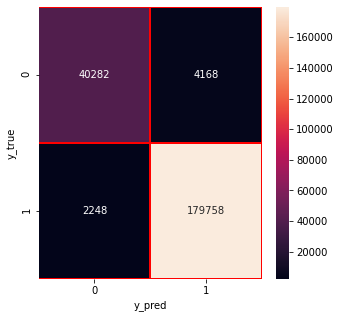

In [ ]:
#probability_class_1 = y_train.predict_proba(X)[:, 1]
cm=confusion_matrix(y_train,y_pred_train)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

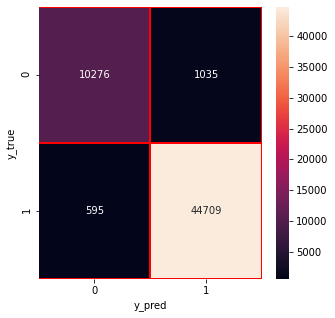

In [ ]:
cm=confusion_matrix(y_test,y_pred_test)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
y_score = pipe_mlp.predict_proba(X_train)[:,1]
y_score1 = pipe_mlp.predict_proba(X_test)[:,1]

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

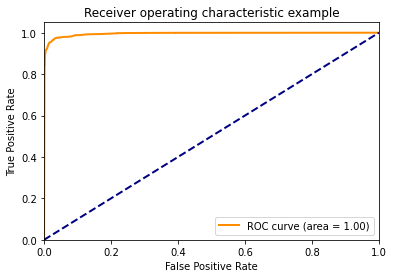

In [ ]:
# Compute micro-average ROC curve and ROC area of  train set
fpr["micro"], tpr["micro"], _ = roc_curve(y_train.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

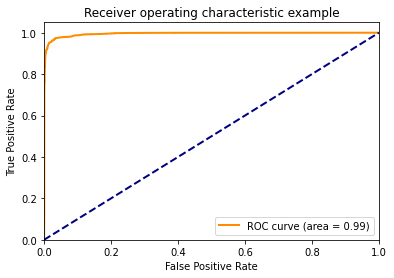

In [ ]:
# Compute micro-average ROC curve and ROC area of  test set
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
%%time
#Logistic Regration###
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression())])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X_shuf, y=y_shuf, train_sizes=np.linspace(0.2,1.0,10), cv=10, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

CPU times: user 1.47 s, sys: 240 ms, total: 1.71 s
Wall time: 3min 49s


In [ ]:
%%time
pipe_lr = pipe_lr.fit(X_train, y_train)

CPU times: user 6.55 s, sys: 2.9 s, total: 9.45 s
Wall time: 4.95 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
%%time
y_pred_train = pipe_lr.predict(X_train)
y_pred_test = pipe_lr.predict(X_test)

CPU times: user 91.4 ms, sys: 60.7 ms, total: 152 ms
Wall time: 79.5 ms


In [ ]:
accuracy_score(y_test, y_pred_test)

0.9051488121522565

In [ ]:
accuracy_score(y_train, y_pred_train)

0.9064851450171336

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

      Attack       0.80      0.70      0.75     44450
      Benign       0.93      0.96      0.94    182006

    accuracy                           0.91    226456
   macro avg       0.86      0.83      0.84    226456
weighted avg       0.90      0.91      0.90    226456



In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

      Attack       0.80      0.70      0.75     11311
      Benign       0.93      0.96      0.94     45304

    accuracy                           0.91     56615
   macro avg       0.86      0.83      0.84     56615
weighted avg       0.90      0.91      0.90     56615



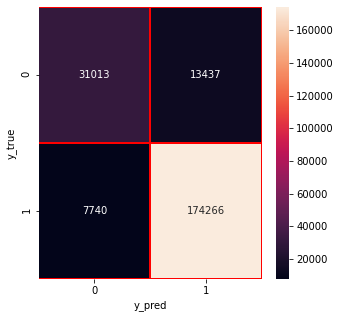

In [ ]:
cm=confusion_matrix(y_train,y_pred_train)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

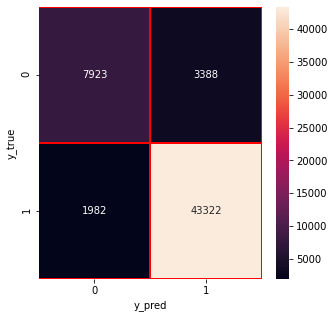

In [ ]:
cm=confusion_matrix(y_test,y_pred_test)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
y_score = pipe_lr.fit(X_train, y_train).decision_function(X_train)
y_score1 = pipe_lr.fit(X_train, y_train).decision_function(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_train.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

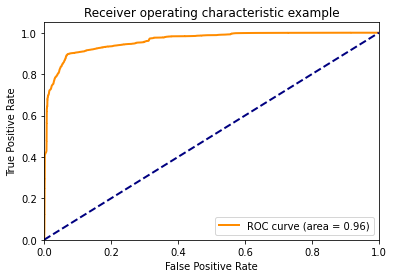

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

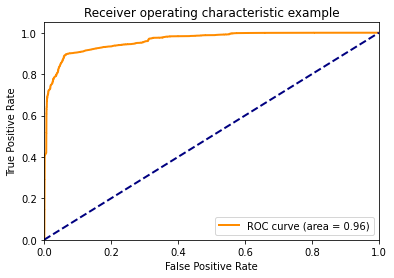

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
%%time
# Decision Tree ####
from sklearn import tree

CPU times: user 8 µs, sys: 4 µs, total: 12 µs
Wall time: 16.2 µs


In [ ]:
X_shuf, y_shuf = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_shuf,y_shuf, test_size=0.20, random_state = 1)

In [ ]:
%%time
pipe_tree = Pipeline([('scl', StandardScaler()),('clf', tree.DecisionTreeClassifier())])
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(estimator=pipe_tree,X=X_train, y=y_train, train_sizes=np.linspace(0.2,1.0,10), cv=10, n_jobs=-1)
train_mean_tree = np.mean(train_scores_tree, axis=1)
train_std_tree = np.std(train_scores_tree, axis=1)
test_mean_tree = np.mean(test_scores_tree, axis=1)
test_std_tree = np.std(test_scores_tree, axis=1)

CPU times: user 1.74 s, sys: 265 ms, total: 2 s
Wall time: 5min 32s


In [ ]:
%%time
pipe_tree = pipe_tree.fit(X_train, y_train)

CPU times: user 8.89 s, sys: 5.18 ms, total: 8.9 s
Wall time: 8.9 s


In [ ]:
y_pred_train = pipe_tree.predict(X_train)

In [ ]:
y_pred_test = pipe_tree.predict(X_test)

In [ ]:
accuracy_score(y_train, y_pred_train)

0.999938177835871

In [ ]:
accuracy_score(y_test, y_pred_test)

0.9986752627395566

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00     44741
      Benign       1.00      1.00      1.00    181715

    accuracy                           1.00    226456
   macro avg       1.00      1.00      1.00    226456
weighted avg       1.00      1.00      1.00    226456



In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00     11020
      Benign       1.00      1.00      1.00     45595

    accuracy                           1.00     56615
   macro avg       1.00      1.00      1.00     56615
weighted avg       1.00      1.00      1.00     56615



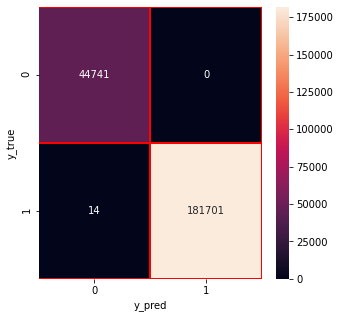

In [ ]:
cm=confusion_matrix(y_train,y_pred_train)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

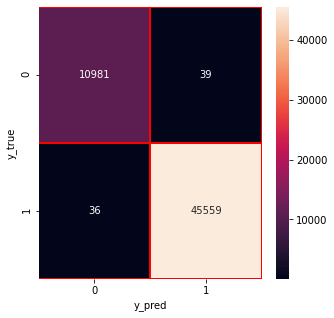

In [ ]:
cm=confusion_matrix(y_test,y_pred_test)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
y_score = pipe_tree.fit(X_train, y_train).predict_proba(X_train)[:,1]
y_score1 = pipe_tree.fit(X_train, y_train).predict_proba(X_test)[:,1]

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

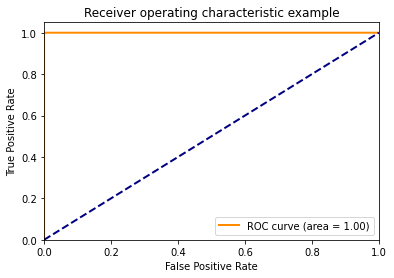

In [ ]:
# Compute micro-average ROC curve and ROC area of training test
fpr["micro"], tpr["micro"], _ = roc_curve(y_train.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

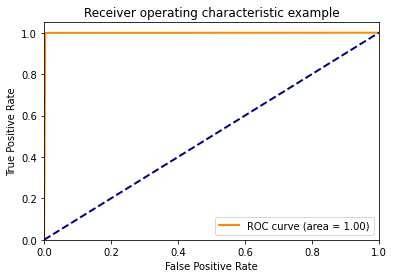

In [ ]:
# Compute micro-average ROC curve and ROC area of test set
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
%%time
# Random Forest ####
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', RandomForestClassifier(n_estimators=10))])
train_sizes_rnd, train_scores_rnd, test_scores_rnd = learning_curve(estimator=pipe_rnd, X=X_shuf, y=y_shuf, train_sizes=np.linspace(0.2,1.0,10), cv=10, n_jobs=-1)
train_mean_rnd = np.mean(train_scores_rnd, axis=1)
train_std_rnd = np.std(train_scores_rnd, axis=1)
test_mean_rnd = np.mean(test_scores_rnd, axis=1)
test_std_rnd = np.std(test_scores_rnd, axis=1)

CPU times: user 1.8 s, sys: 281 ms, total: 2.08 s
Wall time: 5min 21s


In [ ]:
%%time
pipe_rnd = pipe_rnd.fit(X_train, y_train)

CPU times: user 5.5 s, sys: 5.19 ms, total: 5.51 s
Wall time: 5.51 s


In [ ]:
%%time
y_pred_train = pipe_rnd.predict(X_train)
y_pred_test = pipe_rnd.predict(X_test)

CPU times: user 346 ms, sys: 4.98 ms, total: 351 ms
Wall time: 354 ms


In [ ]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9996025718020277, 0.9986222732491389)

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00     44741
      Benign       1.00      1.00      1.00    181715

    accuracy                           1.00    226456
   macro avg       1.00      1.00      1.00    226456
weighted avg       1.00      1.00      1.00    226456



In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00     11020
      Benign       1.00      1.00      1.00     45595

    accuracy                           1.00     56615
   macro avg       1.00      1.00      1.00     56615
weighted avg       1.00      1.00      1.00     56615



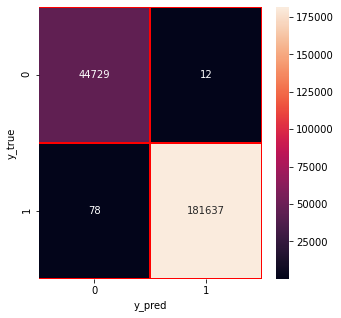

In [ ]:
cm=confusion_matrix(y_train,y_pred_train)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

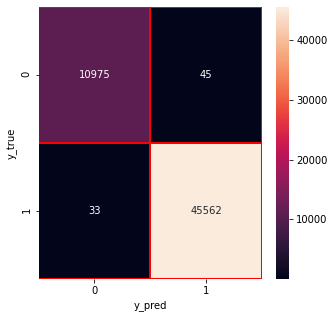

In [ ]:
cm=confusion_matrix(y_test,y_pred_test)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
y_score = pipe_rnd.fit(X_train, y_train).predict_proba(X_train)[:,1]
y_score1 = pipe_rnd.fit(X_train, y_train).predict_proba(X_test)[:,1]

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

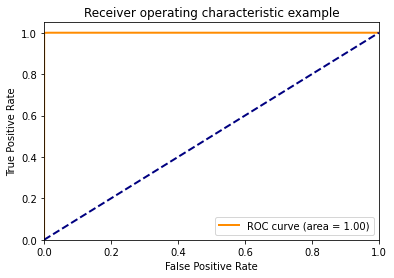

In [ ]:
# Compute micro-average ROC curve and ROC area of  train set
fpr["micro"], tpr["micro"], _ = roc_curve(y_train.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
fpr["micro"], tpr["micro"], _ = roc_curve(y_train.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

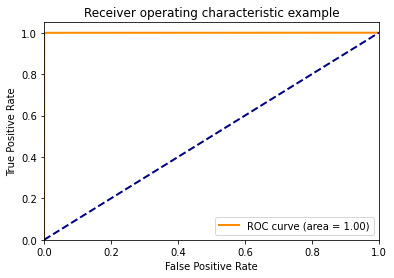

In [ ]:
# Compute micro-average ROC curve and ROC area of test set
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Support vector machine ####
X_shuf, y_shuf = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_shuf,y_shuf, test_size=0.20, random_state = 1)

In [ ]:
# Binarize the output for train set
#y_train = label_binarize(y_train, classes=[0, 1])
# Binarize the output for test set
#y_test = label_binarize(y_test, classes=[0, 1])

In [ ]:
%%time
from sklearn.svm import LinearSVC
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', LinearSVC())])
train_sizes_svc, train_scores_svc, test_scores_svc = learning_curve(estimator=pipe_svc,X=X_shuf, y=y_shuf, train_sizes=np.linspace(0.2,1.0,10), cv=10, n_jobs=-1)
train_mean_svc = np.mean(train_scores_svc, axis=1)
train_std_svc = np.std(train_scores_svc, axis=1)
test_mean_svc = np.mean(test_scores_svc, axis=1)
test_std_svc = np.std(test_scores_svc, axis=1)

CPU times: user 14.2 s, sys: 1.95 s, total: 16.1 s
Wall time: 1h 2min 10s


In [ ]:
%%time
pipe_svc = pipe_svc.fit(X_train, y_train)

CPU times: user 1min 31s, sys: 19.3 ms, total: 1min 31s
Wall time: 1min 31s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
y_pred_train = pipe_svc.predict(X_train)

In [ ]:
y_pred_test = pipe_svc.predict(X_test)

In [ ]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.8902568269332674, 0.8906826812682151)

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

      Attack       0.92      0.49      0.64     44679
      Benign       0.89      0.99      0.94    181777

    accuracy                           0.89    226456
   macro avg       0.90      0.74      0.79    226456
weighted avg       0.89      0.89      0.88    226456



In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

      Attack       0.91      0.49      0.64     11082
      Benign       0.89      0.99      0.94     45533

    accuracy                           0.89     56615
   macro avg       0.90      0.74      0.79     56615
weighted avg       0.89      0.89      0.88     56615



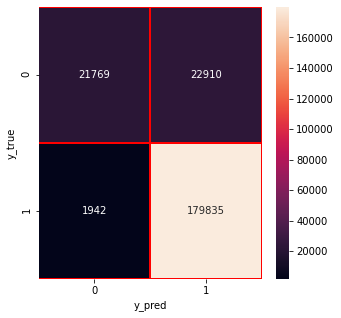

In [ ]:
cm=confusion_matrix(y_train,y_pred_train)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

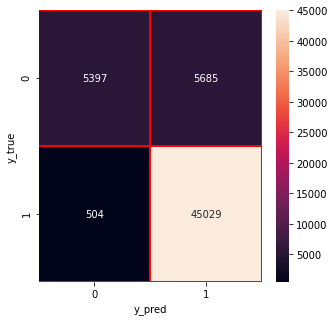

In [ ]:
cm=confusion_matrix(y_test,y_pred_test)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
y_score = pipe_svc.decision_function(X_train)
y_score1 = pipe_svc.decision_function(X_test)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [ ]:
# Compute micro-average ROC curve and ROC area of training test
fpr["micro"], tpr["micro"], _ = roc_curve(y_train.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

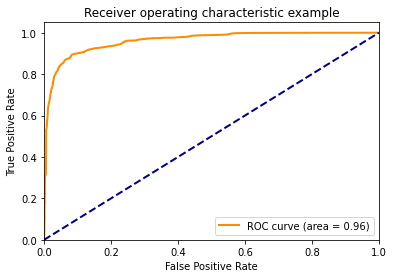

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Compute micro-average ROC curve and ROC area of test set
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

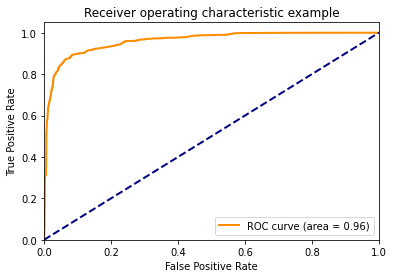

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# kNN ########
X_shuf, y_shuf = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_shuf,y_shuf, test_size=0.20, random_state = 1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
pipe_knn = Pipeline([('scl', StandardScaler()),('clf', knn)])
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(estimator=pipe_knn,X=X_shuf, y=y_shuf, train_sizes=np.linspace(0.2,1.0,5), cv=10, n_jobs=-1)
train_mean_knn = np.mean(train_scores_knn, axis=1)
train_std_knn = np.std(train_scores_knn, axis=1)
test_mean_knn = np.mean(test_scores_knn, axis=1)
test_std_knn = np.std(test_scores_knn, axis=1)

In [ ]:
pipe_knn = pipe_knn.fit(X_train, y_train)

In [ ]:
y_pred_train = pipe_knn.predict(X_train)

In [ ]:
y_pred_test = pipe_knn.predict(X_test)

In [ ]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9916937506623803, 0.9880950278194824)

In [ ]:
print(classification_report(y_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

      Attack       0.97      0.99      0.98     44455
      Benign       1.00      0.99      0.99    182001

    accuracy                           0.99    226456
   macro avg       0.98      0.99      0.99    226456
weighted avg       0.99      0.99      0.99    226456



In [ ]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

      Attack       0.97      0.98      0.97     10884
      Benign       1.00      0.99      0.99     45414

    accuracy                           0.99     56298
   macro avg       0.98      0.99      0.98     56298
weighted avg       0.99      0.99      0.99     56298



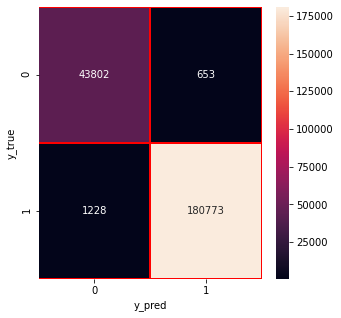

In [ ]:
cm=confusion_matrix(y_train,y_pred_train)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

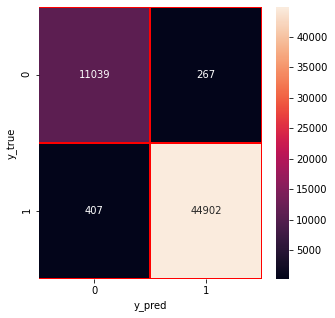

In [ ]:
cm=confusion_matrix(y_test,y_pred_test)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
y_score = pipe_knn.predict_proba(X_train)[:,1]
y_score1 = pipe_knn.predict_proba(X_test)[:,1]

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

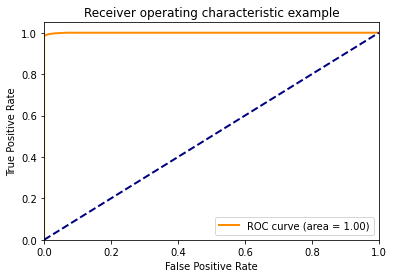

In [ ]:
# Compute micro-average ROC curve and ROC area of  train set
fpr["micro"], tpr["micro"], _ = roc_curve(y_train.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

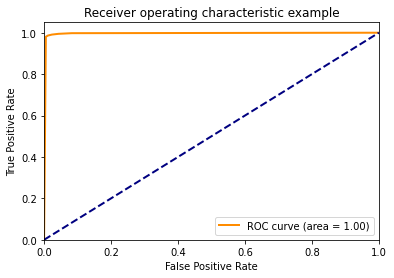

In [ ]:
# Compute micro-average ROC curve and ROC area of  test set
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()